Hi from Rithish


In [38]:
%pip install 'qiskit[visualization]'
%pip install qiskit-ibm-runtime
%pip install qiskit-aer

In [43]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_distribution

import numpy as np
from numpy import sqrt

In [39]:
QiskitRuntimeService.save_account(
                                channel="ibm_cloud",
                                token = api_key,
                                instance = crn,
                                overwrite = True )

In [40]:
service = QiskitRuntimeService()
service.saved_accounts()

{'default-ibm-cloud': {'channel': 'ibm_cloud',
  'url': 'https://cloud.ibm.com',
  'token': 'Y_PRnlySrpwiHhLy8eP9V3E0zvlEcekamn5cWOx_lyQI',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/d2c50f33c43a44abb94280706332351d:6ac205d7-e923-4163-a517-95a17ae7f74d::',
  'verify': True,
  'private_endpoint': False}}

In [42]:
service.backends()

[<IBMBackend('ibm_quebec')>]

In [41]:
!pip install pyqubo

H = (lambda_0 * Obj + lambda_1 * C1mod - lambda_2 * C2 - lambda_3 * C3 + lambda_4 * C4) # This is the Energy Function


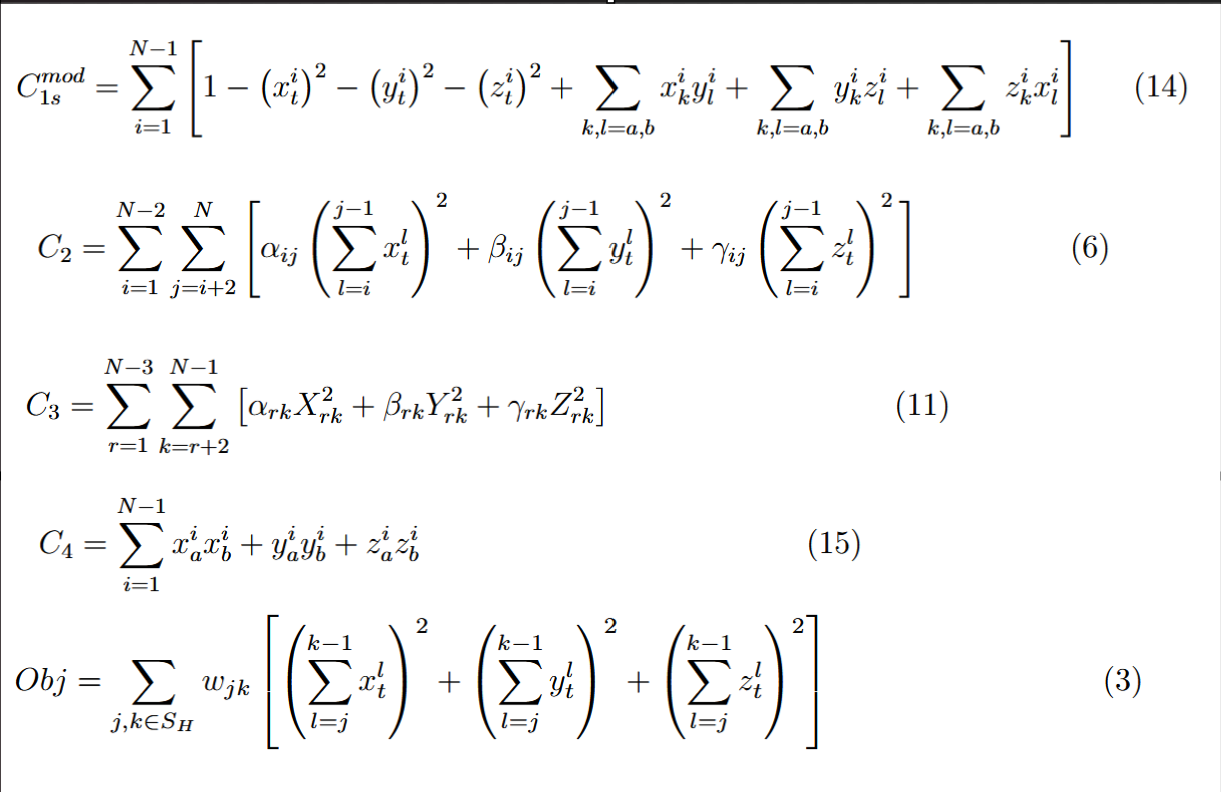

# OR THIS BELOW ONE for LIST COMPREHENSIONED version


In [195]:
from pyqubo import Binary, Constraint, Placeholder
import numpy as np

# ----------- PARAMETERS ----------- #
N = 4  # Number of beads
SH = [0, 2]  # Indices of H-type beads
w = 1  # Interaction weight

lambda0 = Placeholder("lambda0")
lambda1 = Placeholder("lambda1")
lambda2 = Placeholder("lambda2")
lambda3 = Placeholder("lambda3")
lambda4 = Placeholder("lambda4")

# ----------- VARIABLES ----------- #
x_a = [Binary(f"x_{i}_a") for i in range(N - 1)]
x_b = [Binary(f"x_{i}_b") for i in range(N - 1)]
y_a = [Binary(f"y_{i}_a") for i in range(N - 1)]
y_b = [Binary(f"y_{i}_b") for i in range(N - 1)]
z_a = [Binary(f"z_{i}_a") for i in range(N - 1)]
z_b = [Binary(f"z_{i}_b") for i in range(N - 1)]

x_t = [x_a[i] - x_b[i] for i in range(N - 1)]
y_t = [y_a[i] - y_b[i] for i in range(N - 1)]
z_t = [z_a[i] - z_b[i] for i in range(N - 1)]

# ----------- OBJECTIVE FUNCTION ----------- #
objective = sum(
    w * (sum(x_t[l] for l in range(SH[j], SH[k]))**2 +
         sum(y_t[l] for l in range(SH[j], SH[k]))**2 +
         sum(z_t[l] for l in range(SH[j], SH[k]))**2)
    for j in range(len(SH)) for k in range(j + 1, len(SH))
    if SH[k] != SH[j] + 1
)

# ----------- CONTINUITY CONSTRAINT (C1) ----------- #
def continuity_term(i):
    xt2 = x_a[i] + x_b[i] - 2 * x_a[i] * x_b[i]
    yt2 = y_a[i] + y_b[i] - 2 * y_a[i] * y_b[i]
    zt2 = z_a[i] + z_b[i] - 2 * z_a[i] * z_b[i]
    xy = x_a[i]*y_a[i] + x_a[i]*y_b[i] + x_b[i]*y_a[i] + x_b[i]*y_b[i]
    yz = y_a[i]*z_a[i] + y_a[i]*z_b[i] + y_b[i]*z_a[i] + y_b[i]*z_b[i]
    zx = z_a[i]*x_a[i] + z_a[i]*x_b[i] + z_b[i]*x_a[i] + z_b[i]*x_b[i]
    return 1 - xt2 - yt2 - zt2 + xy + yz + zx

c1_mod = sum(continuity_term(i) for i in range(N - 1))

# ----------- C2: Overlap constraint (vectorized) ----------- #
def generate_coefficients(i, j):
    nums = np.random.normal(0, 1, 3)
    if nums[0] > nums[1] and nums[0] > nums[2]:
        return 1, 0, 0
    elif nums[1] > nums[0] and nums[1] > nums[2]:
        return 0, 1, 0
    else:
        return 0, 0, 1

c2_terms = [
    a * sum(x_t[l] for l in range(i, j))**2 +
    b * sum(y_t[l] for l in range(i, j))**2 +
    c * sum(z_t[l] for l in range(i, j))**2
    for i in range(N - 2)
    for j in range(i + 2, N)
    for a, b, c in [generate_coefficients(i, j)]
]
c2 = sum(c2_terms)

# ----------- Helper: compute X_rk, Y_rk, Z_rk ----------- #
def compute_XYZ_rk(x_list, y_list, z_list, r, k):
    """Compute X_rk, Y_rk, Z_rk = x_t^r + x_t^k + 2*sum_{j=r+1}^{k-1} x_t^j"""
    if k - r == 1:  # adjacent indices
        X_rk = x_list[r] + x_list[k]
        Y_rk = y_list[r] + y_list[k]
        Z_rk = z_list[r] + z_list[k]
    else:
        X_rk = x_list[r] + x_list[k] + 2*sum(x_list[j] for j in range(r+1, k))
        Y_rk = y_list[r] + y_list[k] + 2*sum(y_list[j] for j in range(r+1, k))
        Z_rk = z_list[r] + z_list[k] + 2*sum(z_list[j] for j in range(r+1, k))
    return X_rk, Y_rk, Z_rk

# ----------- C3: Diagonal crossing constraint (vectorized) ----------- #
c3_terms = [
    a * X_rk**2 + b * Y_rk**2 + c * Z_rk**2
    for r in range(N - 3)
    for k in range(r + 2, N - 1)
    for a, b, c in [generate_coefficients(r, k)]
    for X_rk, Y_rk, Z_rk in [compute_XYZ_rk(x_t, y_t, z_t, r, k)]
]
c3 = sum(c3_terms)

# ----------- C4: Steric diagonal constraint ----------- #
c4 = sum(x_a[i]*x_b[i] + y_a[i]*y_b[i] + z_a[i]*z_b[i] for i in range(N - 1))

# ----------- COMBINED HAMILTONIAN ----------- #
H = (lambda0 * objective +
     lambda1 * Constraint(c1_mod, label="Continuity") -
     lambda2 * Constraint(c2, label="Overlap") -
     lambda3 * Constraint(c3, label="NoCross") +
     lambda4 * Constraint(c4, label="NoDiag"))

# ----------- COMPILE TO QUBO ----------- #
n2 = ((N-2)*(N-3))/2
n3 = ((N-3)*(N-2))/2
l0 = (n2+(3*n3))/n3
model = H.compile()
feed_dict = {"lambda0": l0, "lambda1": 5.0, "lambda2": 1.0, "lambda3": 2.0, "lambda4": 5.0}
qubo, offset = model.to_qubo(feed_dict=feed_dict)


In [196]:
import re
from qiskit.quantum_info import SparsePauliOp, Pauli
import numpy as np

def pyqubo2nlocalising(qubo):
    """
    Converts a pyqubo QUBO dict to a Qiskit SparsePauliOp using (I - Z)/2 mapping
    """
    # Extract all unique binary variable names from QUBO keys
    unique_variables = set()
    for key_pair in qubo.keys():
        unique_variables.update(key_pair)

    # Sort to fix qubit order
    unique_variables_list = sorted(unique_variables)
    var_index_map = {var: i for i, var in enumerate(unique_variables_list)}
    num_qubits = len(unique_variables_list)

    paulis = []
    coeffs = []

    for (var1, var2), weight in qubo.items():
        z = np.zeros(num_qubits, dtype=bool)
        x = np.zeros(num_qubits, dtype=bool)

        if var1 == var2:
            # Linear term → 1-variable (Z_i)
            idx = var_index_map[var1]
            #pauli = Pauli((z.copy(), x.copy()))
            #paulis.append(pauli)
            #coeffs.append(weight * 0.25)

            paulis.append(Pauli((z.copy(), x.copy())))
            coeffs.append(weight * 0.25)

            z[idx] = True
            paulis.append(Pauli((z, x.copy())))
            coeffs.append(-0.5 * weight)
        else:
            # Quadratic term → Z_i Z_j
            i = var_index_map[var1]
            j = var_index_map[var2]
            z[i] = True
            z[j] = True
            paulis.append(Pauli((z, x.copy())))
            coeffs.append(0.25 * weight)

            # Add 2 linear terms due to expansion of x_i x_j
            for idx in (i, j):
                z_single = np.zeros(num_qubits, dtype=bool)
                z_single[idx] = True
                paulis.append(Pauli((z_single, x.copy())))
                coeffs.append(-0.25 * weight)

            # Constant term (just scalar)
            paulis.append(Pauli((np.zeros(num_qubits, dtype=bool), x.copy())))
            coeffs.append(0.25 * weight)

    return SparsePauliOp(paulis, coeffs=np.array(coeffs)), unique_variables_list


In [197]:
hamiltonian, var_order = pyqubo2nlocalising(qubo)

# Show result
with open("qubo_qiskit_output.txt", "w") as f:
    f.write(" SparsePauliOp (Qiskit format):\n")
    f.write(str(hamiltonian) + "\n\n")
    f.write(" Variable Order:\n")
    f.write(str(var_order) + "\n")

print("Output written to qubo_qiskit_output.txt")

Output written to qubo_qiskit_output.txt


In [198]:
#Map step, create an initial guess (ansatz) that you will use to minimize (you will use
#the one outlined in the paper Efficient SU2). Set up necessary backend protocols.
from qiskit.circuit.library import efficient_su2

num_qubits = len(var_order)
ansatz = efficient_su2(num_qubits, su2_gates=["rx", "ry"], entanglement="reverse_linear", reps=1)
# ansatz.draw("mpl")

In [199]:
#backend=service.least_busy()
backend=AerSimulator()

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

In [200]:
from qiskit_ibm_runtime import Estimator

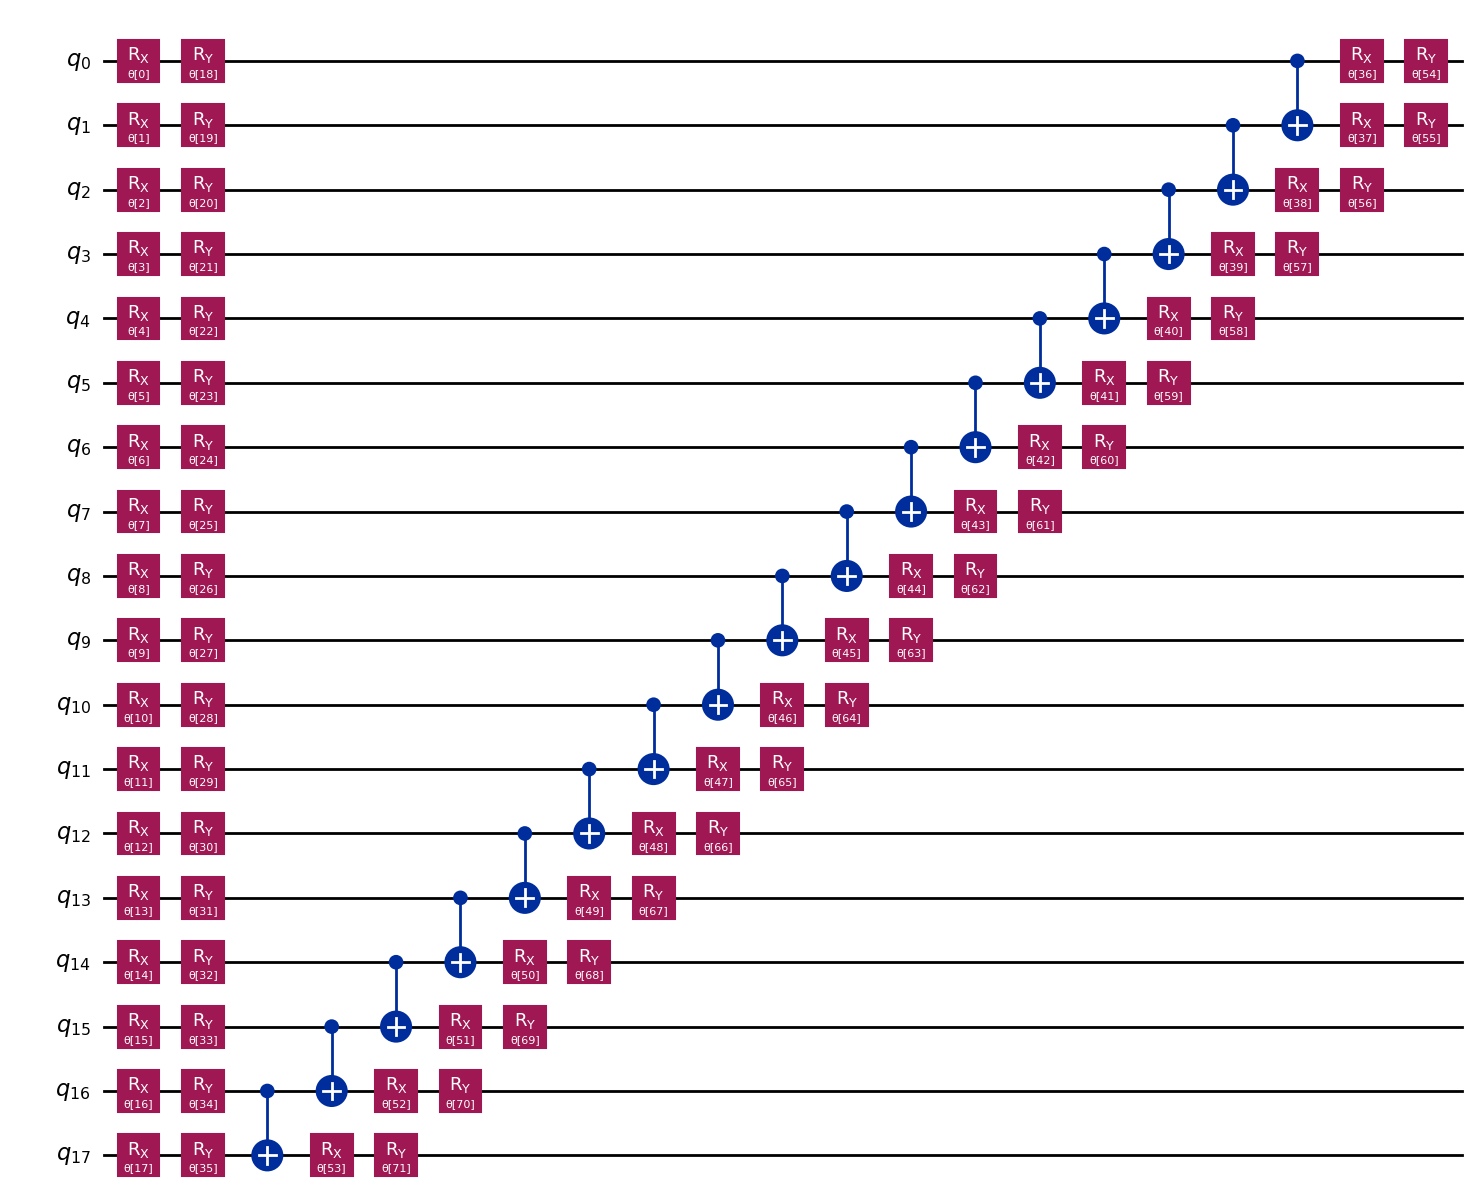

In [201]:
# # Optimize ->to change function/ names
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# config = backend.configuration()

# print("Backend: {config.backend_name}")
# print("Native gates: ", config.supported_instructions, ",")


target = backend.target

pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(ansatz)

ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [52]:
!pip install qiskit_algorithms


In [ ]:
#Estimator approach - Calc Expectation value right away
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=800) #num iterations

energies = []
def store_energy(eval_count, parameters, mean, std):
    energies.append(mean)

# Estimator for runtime
estimator = Estimator(mode=backend)
vqe = VQE(estimator, ansatz_isa, optimizer, callback=store_energy)

result = vqe.compute_minimum_eigenvalue(hamiltonian)
print(f"Final energy: {result.eigenvalue.real:.6f}")

plt.plot

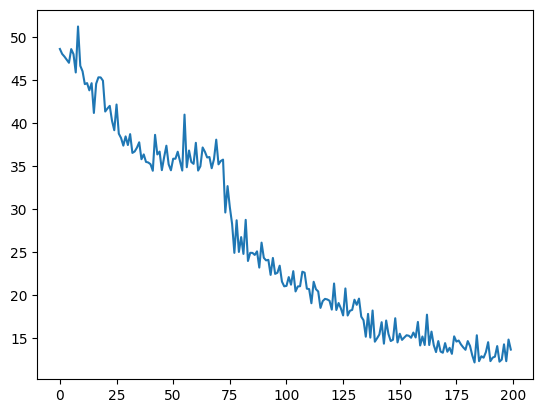

In [206]:
import matplotlib.pyplot as plt
plt.plot(energies)

In [148]:
plt.savefig("graph3.png" )

<Figure size 640x480 with 0 Axes>

In [207]:
from neal import SimulatedAnnealingSampler

sampler = SimulatedAnnealingSampler()
solution = sampler.sample_qubo(qubo, num_reads=100)

lowest = solution.first
print(f"Lowest Classical Energy: {lowest.energy:.6f}")
print(f"Our energy: {result.eigenvalue.real:.6f}")
compare = abs(lowest.energy - result.eigenvalue.real)
print(f"Comparison: {compare:.6f}")

Lowest Classical Energy: -36.000000
Our energy: 12.159668
Comparison: 48.159668
